In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pykalman import KalmanFilter
from datetime import datetime
from statsmodels.nonparametric.smoothers_lowess import lowess

In [7]:
def prep_data(filename):
    """
    Read file and convet
    """
#     column_name = ['time', 'x_accel', 'y_accel', 'z_accel', 'total_accel']
    column_name = ['time', 'x_accel', 'y_accel', 'z_accel']
    raw_data = pd.read_csv(filename, names=column_name, header=None) 
    raw_data = raw_data.drop(0)

#     raw_data['time'] = raw_data['time'].apply(to_float)
#     raw_data['total_accel'] = raw_data['total_accel'].apply(to_float)
    raw_data['time'] = raw_data['time'].apply(to_timestamp)
    raw_data['time'] = raw_data['time']-raw_data['time'][1]
    raw_data['x_accel'] = raw_data['x_accel'].apply(to_float)
    raw_data['y_accel'] = raw_data['y_accel'].apply(to_float)
    raw_data['z_accel'] = raw_data['z_accel'].apply(to_float)
    
#     accel = raw_data['total_accel'].tolist()
    time = raw_data['time'].tolist()
    x = raw_data['x_accel'].tolist()
    y = raw_data['y_accel'].tolist()
    z = raw_data['z_accel'].tolist()

    # Lowess accelerations    
    x_lowess = lowess(x, time, frac=0.09)
    y_lowess = lowess(y, time, frac=0.09)
    z_lowess = lowess(z, time, frac=0.09)

    x_vel = np.trapz(x_lowess[:,1], time)
    y_vel = np.trapz(y_lowess[:,1], time)
    z_vel = np.trapz(z_lowess[:,1], time)
    
    print(x_vel, y_vel, z_vel)
    print(calc_distance((0,0), (x_vel, y_vel)))    
    lowess_columns = {'time':time,
                      'x_lowess':x_lowess[:,1],
                      'y_lowess':y_lowess[:,1],
                      'z_lowess':z_lowess[:,1]
                      }
    data_lowess = pd.DataFrame(lowess_columns)
#     data_lowess.to_csv(filename)
    
    plt.plot(time, x_lowess[:,1], "r-", linewidth=2, alpha=0.2)
    plt.plot(time, y_lowess[:,1], "g-", linewidth=2, alpha=0.2)
    plt.plot(time, z_lowess[:,1], "b-", linewidth=2, alpha=0.2)
    plt.title('LOWESS smoothed acceleration')
    plt.xlabel('time')
    plt.ylabel('acceleration')
    plt.legend(['x', 'y', 'z'])
    plt.show()
    
    # Kalman Filter accelerations
    
    """
    # Kalman Filter
    std = np.std(accel)
    print(std)
    initial_guess = [0]
    observation_covariance = std**2#np.diag([std, std]) ** 2
    kf = KalmanFilter(
            initial_state_mean= initial_guess,
            initial_state_covariance=observation_covariance,
            observation_covariance=observation_covariance,
            )
    pred_state, state_cov = kf.smooth(accel)
    
    plt.plot(time, pred_state[:,0], 'g-', linewidth=2, alpha=0.5)
    plt.plot(time, accel, 'b.', alpha = 0.1)
    plt.show()
    """

In [3]:
def calc_distance(x, y):
    vector = np.subtract(x, y)
    return np.linalg.norm(vector)  

In [4]:
def to_float(x):
    return float(x)

In [5]:
def to_timestamp(x):
    x = datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f')
    return datetime.timestamp(x)

-13.946487431692603 12.43954729621673 -5.753012203580488
18.688147276206184


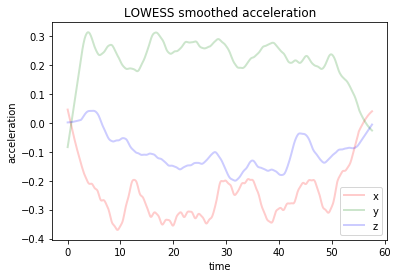

In [8]:
prep_data("data/Jordan_ankle_right_1.csv")